# Contents<a id='back'></a>

* [Introduction](#intro)
* [Stage 1. Data overview](#overview)
* [Stage 2. EDA](#eda)
* [Stage 3. Hypotheses Testing](#hypo)
     * [3.1 Hypothesis 1:The average duration of rides from the Loop to O'Hare International Airport does not change on rainy Saturdays.](#hypo1)
* [Conclusion](#end)

# Introduction<a id='intro'></a>

You're working as an analyst for Zuber, a new ride-sharing company that's launching in Chicago. 

Your task is to find patterns in the available information. You want to understand passenger preferences and the impact of external factors on rides.
Working with a database, you'll analyze data from competitors and test a hypothesis about the impact of weather on ride frequency.

The datasets have gone thorugh preprocessing in SQL.

## Stage 1. Data overview<a id='overview'></a>

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

In [2]:
# Import datafarmes

df_taxis = pd.read_csv("project_sql_result_01.csv")
df_trips = pd.read_csv("project_sql_result_04.csv")
df_sql_result = pd.read_csv("project_sql_result_07.csv")

In [3]:
df_taxis

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,"2241 - 44667 - Felman Corp, Manuel Alonso",3


In [4]:
df_trips

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


## Stage 2. EDA<a id='eda'></a>

1. Identify the top 10 neighborhoods in terms of drop-offs
2. Make graphs: taxi companies and number of rides, top 10 neighborhoods by number of dropoffs

**Top 10 Dropoffs & Charts**

In [5]:
# Identify the top 10 neighborhoods in terms of drop-offs

df_trips_top_10 = df_trips.sort_values(by=['average_trips'], ascending=False).head(10)
df_trips_top_10

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


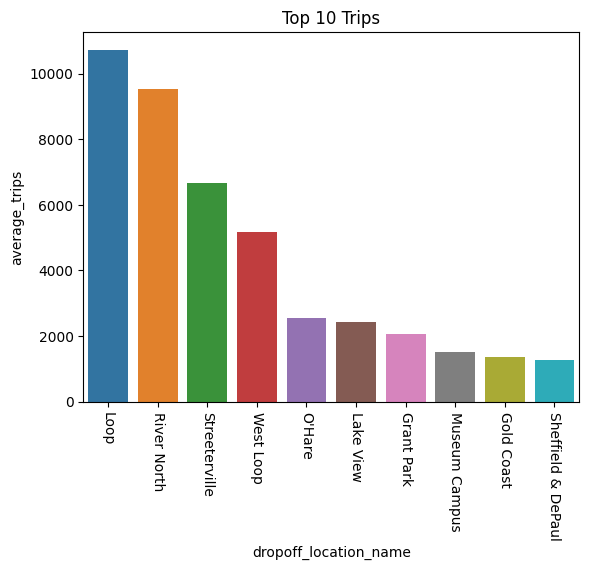

In [18]:
# Bar chart for Top 10 Trips

plt.figure()
sns.barplot(x='dropoff_location_name', y='average_trips', data = df_trips_top_10)

plt.title('Top 10 Trips')
plt.xticks(rotation=-90)
plt.show()

**Make graphs: taxi companies and number of rides, top 10 neighborhoods by number of dropoffs**

In [7]:
df_taxis_top_10 = df_taxis.sort_values(by=['trips_amount'], ascending=False).head(10)
df_taxis_top_10

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


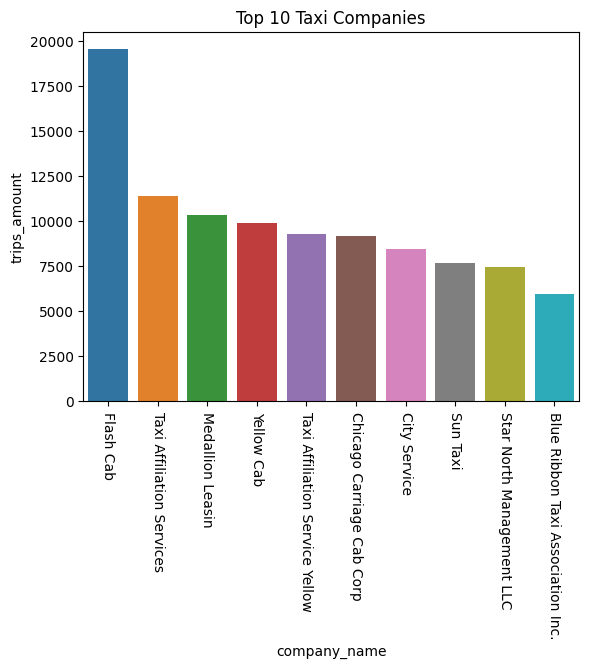

In [19]:
# Pie chart for Top 10 Taxi Companies

plt.figure()
sns.barplot(x='company_name', y='trips_amount', data = df_taxis_top_10)

plt.title('Top 10 Taxi Companies')
plt.xticks(rotation=-90)
plt.show()

**EDA Conclusion :**

Passenger's most go to Locations are `Loop`, `River North` and `Streeterville`. 

The most use Taxi Companies are `Flash Cab`, `Taxi Affiliation Services` and `Medallion Leasin`.

## Stage 3. Hypotheses Testing<a id='hypo'></a>

Test the hypothesis:

The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays. 

In [9]:
# Study data

df_sql_result.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [10]:
# Change start_ts column to datetime

df_sql_result['start_ts'] = pd.to_datetime(df_sql_result['start_ts'])

In [11]:
# Check unique value

df_sql_result['weather_conditions'].unique()

array(['Good', 'Bad'], dtype=object)

In [12]:
# Add column for weekday

df_sql_result['weekday'] =  df_sql_result['start_ts'].dt.day_name()
df_sql_result

,start_ts,weather_conditions,duration_seconds,weekday
0,2017-11-25 16:00:00,Good,2410.0,Saturday
1,2017-11-25 14:00:00,Good,1920.0,Saturday
2,2017-11-25 12:00:00,Good,1543.0,Saturday
3,2017-11-04 10:00:00,Good,2512.0,Saturday
4,2017-11-11 07:00:00,Good,1440.0,Saturday
...,...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0,Saturday
1064,2017-11-11 10:00:00,Good,1318.0,Saturday
1065,2017-11-11 13:00:00,Good,2100.0,Saturday
1066,2017-11-11 08:00:00,Good,1380.0,Saturday


In [13]:
# Dataframe for rainy saturdays

df_bad_sat = df_sql_result[(df_sql_result['weather_conditions'] == 'Bad') & (df_sql_result['weekday'] == 'Saturday')]
df_bad_sat

,start_ts,weather_conditions,duration_seconds,weekday
6,2017-11-04 16:00:00,Bad,2969.0,Saturday
30,2017-11-18 12:00:00,Bad,1980.0,Saturday
34,2017-11-04 17:00:00,Bad,2460.0,Saturday
51,2017-11-04 16:00:00,Bad,2760.0,Saturday
52,2017-11-18 12:00:00,Bad,2460.0,Saturday
...,...,...,...,...
1031,2017-11-18 12:00:00,Bad,2560.0,Saturday
1032,2017-11-18 10:00:00,Bad,1908.0,Saturday
1053,2017-11-18 12:00:00,Bad,2400.0,Saturday
1061,2017-11-18 16:00:00,Bad,2186.0,Saturday


In [14]:
df_good_sat = df_sql_result[(df_sql_result['weather_conditions'] == 'Good')]
df_good_sat

,start_ts,weather_conditions,duration_seconds,weekday
0,2017-11-25 16:00:00,Good,2410.0,Saturday
1,2017-11-25 14:00:00,Good,1920.0,Saturday
2,2017-11-25 12:00:00,Good,1543.0,Saturday
3,2017-11-04 10:00:00,Good,2512.0,Saturday
4,2017-11-11 07:00:00,Good,1440.0,Saturday
...,...,...,...,...
1062,2017-11-11 06:00:00,Good,1500.0,Saturday
1063,2017-11-25 11:00:00,Good,0.0,Saturday
1064,2017-11-11 10:00:00,Good,1318.0,Saturday
1065,2017-11-11 13:00:00,Good,2100.0,Saturday


### Hypothesis 1: The average duration of rides from the Loop to O'Hare International Airport does not change on rainy Saturdays.<a id ='hypo1'></a>

H0 = The average duration of rides from the Loop to O'Hare International Airport does not change on rainy Saturdays.

H1 = The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.

Alpha value = 0.05

In [15]:
alpha = 0.05

results = st.ttest_ind(df_bad_sat['duration_seconds'], df_good_sat['duration_seconds'])

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 6.517970327099473e-12
We reject the null hypothesis


# Conclusion <a id='end'></a>

The p-value is smaller than the alpha value. Hence, we will reject the null hypothesis. 

Therefore, the average duration of rides from the Loop to O'Hare International Airport will change on rainy Saturdays.